In [13]:
# Auxiliary
import pandas as pd
import numpy as np
from sklearn.base import TransformerMixin

# Validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Stat Models
from sklearn.linear_model import LogisticRegression

# Load 15k Data

In [14]:
data = pd.read_csv('data/15k-labeled-binary-all.csv')
data = data.dropna()
# Map pro-vax and neutral together
data.head()

,text,label
0,My 87 year old grandmother has been quarantini...,0
1,I’m so excited that with this vaccine I can se...,0
2,So excited that I was able to close out 2020 o...,0
3,"I’m getting my COVID-19 vaccine, baby! I’m so ...",0
4,Excited and grateful for ending 2020 with the ...,0


In [15]:
# Pre split off test data
data_test = data.sample(frac=0.1)
data = data.drop(data_test.index)

In [16]:
#fracs = [0.001, 0.002, 0.003, 0.004, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075] + [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
fracs = [0.01, 0.025, 0.05, 0.075] + [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

In [17]:
#fracs = [0.1, 0.2, 0.3, 0.4, 0.5]

Multinom_Scores = []
Multinom_Accuracies = []

for frac in fracs:
    X = data['text']
    y = data['label']
    nrow = X.shape[0]

    samp_size = np.round(nrow * frac).astype(int)
    samples = np.random.choice(np.arange(0, nrow), size=samp_size, replace=False)

    X = X.iloc[samples]
    y = y.iloc[samples]

    # Initialize empty lists for storing errors
    multinom_scores = []
    multinom_accuracies = []

    # Kfold spec
    kf = KFold(n_splits=5)

    vect = CountVectorizer(binary=True)
    print(X.shape)
    
    for train_index, val_index in kf.split(X):

        # Split Training and Test data
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Fit and transform the text data * Note the difference between fit_transform() and transform()
        X_train = vect.fit_transform(X_train)
        X_val = vect.transform(X_val)

        # # Note: this section may make the explanation more complicated, but it does slightly improve performance
        tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
        X_train = tfidf_transformer.fit_transform(X_train)
        X_val = tfidf_transformer.transform(X_val)

        ## MULTINOMIAL REGRESSION
        # Review on use of alpha parameter: default smoothing
        multinom = LogisticRegression()
        multinom.fit(X_train, y_train)
        y_pred = multinom.predict(X_val)
        # Prediction error
        score = f1_score(y_val, y_pred, average='weighted')
        multinom_scores.append(score)
        # Accuracy
        accuracy = np.mean(1 - np.abs(y_val - y_pred))
        multinom_accuracies.append(accuracy)


    Multinom_Accuracies.append(np.mean(multinom_accuracies))
    Multinom_Scores.append(np.mean(multinom_scores)) 

(104,)
(259,)
(518,)
(776,)
(1035,)
(1553,)
(2071,)
(2588,)
(3106,)
(3624,)
(4141,)
(4659,)
(5176,)
(5694,)
(6212,)
(6729,)
(7247,)
(7765,)
(8282,)
(8800,)
(9318,)
(9835,)
(10353,)


# Run for Comparison Data

In [18]:
data = pd.read_csv('data/covid-labeled-binary.csv')
data = data.dropna()
# Map pro-vax and neutral together
data['Rating'] = data.Rating.map({1.0:0, 2.0:0, 3.0:1})
print("Value Counts: \n", (data.Rating.value_counts()))
data.columns = ['text', 'label', 'rating']
data.head()

Value Counts: 
 0    595
1    404
Name: Rating, dtype: int64


,text,label,rating
0,the original strain of sars-cov- and variants...,0,"['origin', 'strain', 'sars-cov', '-', 'variant..."
1,disinformation kills antivaxxer propaganda is...,0,"['disinform', 'kill', 'antivaxx', 'propaganda'..."
2,experience from south africa amp omicron calls...,0,"['experi', 'south', 'africa', 'amp', 'omicron'..."
3,even the american civil liberties union aclu ...,0,"['even', 'american', 'civil', 'liberti', 'unio..."
4,rt eu and au agree to transfer technology for...,0,"['rt', 'eu', 'au', 'agre', 'transfer', 'techno..."


In [19]:
# Pre split off test data
data_test = data.sample(frac=0.1)
data = data.drop(data_test.index)

In [20]:
#fracs = [0.1, 0.2, 0.3, 0.4, 0.5]

Multinom_Scores2 = []
Multinom_Accuracies2 = []

for frac in fracs:
    X = data['text']
    y = data['label']
    nrow = X.shape[0]

    samp_size = np.round(nrow * frac).astype(int)
    samples = np.random.choice(np.arange(0, nrow), size=samp_size, replace=False)

    X = X.iloc[samples]
    y = y.iloc[samples]

    # Initialize empty lists for storing errors
    multinom_scores = []
    multinom_accuracies = []

    # Kfold spec
    kf = KFold(n_splits=5)

    vect = CountVectorizer(binary=True)
    print(X.shape)
    
    for train_index, val_index in kf.split(X):

        # Split Training and Test data
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Fit and transform the text data * Note the difference between fit_transform() and transform()
        X_train = vect.fit_transform(X_train)
        X_val = vect.transform(X_val)

        # # Note: this section may make the explanation more complicated, but it does slightly improve performance
        tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
        X_train = tfidf_transformer.fit_transform(X_train)
        X_val = tfidf_transformer.transform(X_val)

        ## MULTINOMIAL REGRESSION
        # Review on use of alpha parameter: default smoothing
        multinom = LogisticRegression()
        multinom.fit(X_train, y_train)
        y_pred = multinom.predict(X_val)
        # Prediction error
        score = f1_score(y_val, y_pred, average='weighted')
        multinom_scores.append(score)
        # Accuracy
        accuracy = np.mean(1 - np.abs(y_val - y_pred))
        multinom_accuracies.append(accuracy)


    Multinom_Accuracies2.append(np.mean(multinom_accuracies))
    Multinom_Scores2.append(np.mean(multinom_scores)) 

(9,)
(22,)
(45,)
(67,)
(90,)
(135,)
(180,)
(225,)
(270,)
(315,)
(360,)
(405,)
(450,)
(494,)
(539,)
(584,)
(629,)
(674,)
(719,)
(764,)
(809,)
(854,)
(899,)


# Plotting

In [21]:
import matplotlib.pyplot as plt

In [22]:
data.shape

(899, 3)

In [23]:
#np.array(fracs)*data_size

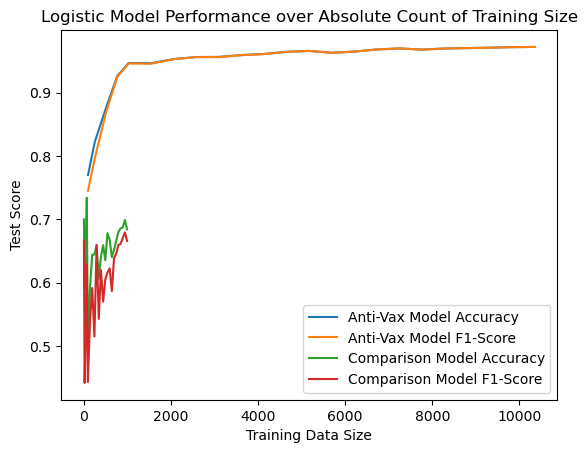

In [24]:
data_size = 10353

plt.plot(np.array(fracs)*data_size, Multinom_Accuracies, label = 'Anti-Vax Model Accuracy')
plt.plot(np.array(fracs)*data_size, Multinom_Scores, label = 'Anti-Vax Model F1-Score')

plt.plot(np.array(fracs)*1000, Multinom_Accuracies2, label = 'Comparison Model Accuracy')
plt.plot(np.array(fracs)*1000, Multinom_Scores2, label = 'Comparison Model F1-Score')

plt.legend()
plt.xlabel("Training Data Size")
plt.ylabel("Test Score")
plt.title("Logistic Model Performance over Absolute Count of Training Size")
plt.show()